In [1]:
import circuitmap as cm
from circuitmap import NeuralDemixer

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
N = 300

In [4]:
sim = cm.simulation.simulate(N=N, trials=1500, H=20, nreps=1, design='blockwise', max_power_min_spike_rate=0.4, connection_prob=0.1)

Creating simulation with specifications:
N 300
T 900
H 20
Trials 1500
Hologram repetitions 1
Connection density 0.1
Spontaneous PSC probability 0.05
Powers [45, 55, 65]
Generating PSC traces...


  0%|          | 0/3 [00:00<?, ?it/s]

Generating spontaneous PSCs...
Sampling correlated noise from Gaussian process...
Complete.



In [5]:
demix = NeuralDemixer(path='demixers/nwd_ie_ChroME2f.ckpt', device='cpu') 

In [6]:
model = cm.Model(N)

In [7]:
model.fit(demix(sim['psc']), sim['stim_matrix'], method='caviar', fit_options={'minimax_spk_prob': 0.4, 'iters': 40})

Demixing PSC traces... complete (elapsed time 1.06s).
Running coordinate-ascent variational inference and isotonic regularisation (CAVIaR) algorithm.


100%|██████████| 40/40 [00:20<00:00,  1.98it/s]


Examining 282 cells for false negatives...
Cell reconnection complete.


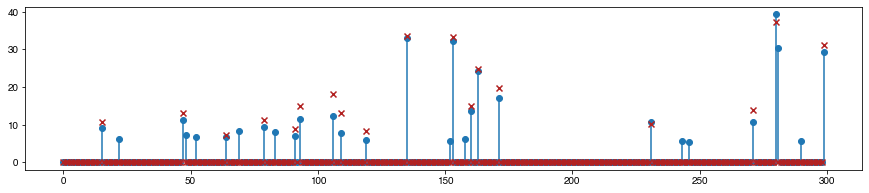

In [8]:
plt.figure(figsize=(15, 3))
plt.stem(sim['weights'])
plt.scatter(np.arange(N), model.state['mu'], color='firebrick', marker='x', zorder=100)
plt.show()